In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mia每类箱型图分析
train_data = np.load('../data/TE/classify/train_data.npy')
for i in range(22):
    reverse_result = np.load('./results/mia/reverse_result/' + str(i) + '.npy')
    reverse_result_protected = np.load('./results/mia/reverse_result_protected/' + str(i) + '.npy')
    sns.set_style('dark')
    fig, ax = plt.subplots(3, 11, figsize=(20, 10))
    plt.title('Result of Class'+str(i))
    ax = ax.ravel()
    for j in range(33):
        sns.boxplot(train_data[0+i*600:600+i*600, j], ax=ax[j], whis=3).set_title('Variable'+str(j))
        ax[j].axvline(x=reverse_result[j], c='green')
        ax[j].axvline(x=reverse_result_protected[j], c='red')
        # ax[j].set(xlim=(-1, 1))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    plt.savefig('./results/mia/每类攻击效果箱型图/' + str(i) + '.svg')
    plt.close()

In [ ]:
# dlg每类箱型图分析
train_data = np.load('../data/TE/classify/train_data.npy')
for i in range(22):
    reverse_result = np.load('./results/dlg/reverse_result/' + str(i) + '.npy')
    reverse_result_protected = np.load('./results/dlg/reverse_result_protected/' + str(i) + '.npy')
    sns.set_style('dark')
    fig, ax = plt.subplots(3, 11, figsize=(20, 10))
    plt.title('Result of Class'+str(i))
    ax = ax.ravel()
    for j in range(33):
        sns.boxplot(train_data[0+i*600:600+i*600, j], ax=ax[j], whis=3).set_title('Variable'+str(j))
        ax[j].axvline(x=reverse_result[j], c='green')
        ax[j].axvline(x=reverse_result_protected[j], c='red')
        # ax[j].set(xlim=(-1, 1))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    plt.savefig('./results/dlg/每类攻击效果箱型图/' + str(i) + '.svg')
    plt.close()

In [ ]:
# mia每个特征箱型图分析
train_data = np.load('../data/TE/classify/train_data.npy')
for j in range(33):
    sns.set_style('dark')
    fig, ax = plt.subplots(2, 11, figsize=(20, 10))
    plt.title('Result of feature'+str(j))
    ax = ax.ravel()
    for i in range(22):
        reverse_result = np.load('./results/mia/reverse_result/' + str(i) + '.npy')
        reverse_result_protected = np.load('./results/mia/reverse_result_protected/' + str(i) + '.npy')
        sns.boxplot(train_data[0+i*600:600+i*600, j], ax=ax[i], whis=3).set_title('Class'+str(i))
        ax[i].axvline(x=reverse_result[j], c='green')
        ax[i].axvline(x=reverse_result_protected[j], c='red')
        # ax[j].set(xlim=(-1, 1))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    plt.savefig('./results/mia/每个特征攻击效果箱型图/' + str(j) + '.svg')
    plt.close()

In [ ]:
# dlg每个特征箱型图分析
train_data = np.load('../data/TE/classify/train_data.npy')
for j in range(33):
    sns.set_style('dark')
    fig, ax = plt.subplots(2, 11, figsize=(20, 10))
    plt.title('Result of feature'+str(j))
    ax = ax.ravel()
    for i in range(22):
        reverse_result = np.load('./results/dlg/reverse_result/' + str(i) + '.npy')
        reverse_result_protected = np.load('./results/dlg/reverse_result_protected/' + str(i) + '.npy')
        sns.boxplot(train_data[0+i*600:600+i*600, j], ax=ax[i], whis=3).set_title('Class'+str(i))
        ax[i].axvline(x=reverse_result[j], c='green')
        ax[i].axvline(x=reverse_result_protected[j], c='red')
        # ax[j].set(xlim=(-1, 1))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    plt.savefig('./results/dlg/每个特征攻击效果箱型图/' + str(j) + '.svg')
    plt.close()

In [2]:
# df_mia and df_mia_pro
train_data = np.load('../data/TE/classify/train_data.npy')
df_mia = pd.DataFrame(index=range(22), columns=range(33))
df_mia_pro = pd.DataFrame(index=range(22), columns=range(33))
for i in range(22):
    reverse_result = np.load('./results/mia/reverse_result/' + str(i) + '.npy')
    reverse_result_protected = np.load('./results/mia/reverse_result_protected/' + str(i) + '.npy')
    for j in range(33):
        df = pd.DataFrame(train_data[0+i*600:600+i*600, j])
        Q1 = df.describe()[0][4]
        Q3 = df.describe()[0][6]
        IQR = Q3 - Q1
        max = Q3 + 3*IQR
        min = Q1 - 3*IQR
        median = df.describe()[0][5]

        if reverse_result[j]>Q1 and reverse_result[j]<Q3:
            df_mia.loc[i, j] = 2
        elif (reverse_result[j]<Q1 and reverse_result[j]>min) or (reverse_result[j]<Q1 and reverse_result[j]>min):
            df_mia.loc[i, j] = 1
        else:
            df_mia.loc[i, j] = 0

        if reverse_result_protected[j]>Q1 and reverse_result_protected[j]<Q3:
            df_mia_pro.loc[i, j] = 2
        elif (reverse_result_protected[j]<Q1 and reverse_result_protected[j]>min) or (reverse_result_protected[j]<Q1 and reverse_result_protected[j]>min):
            df_mia_pro.loc[i, j] = 1
        else:
            df_mia_pro.loc[i, j] = 0        


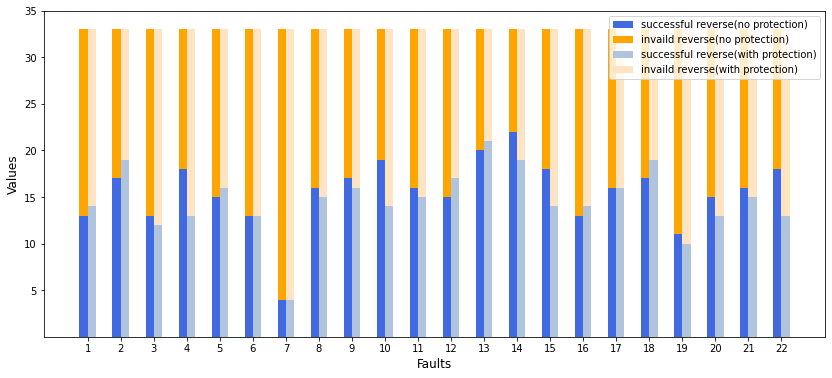

In [3]:
# mia堆叠柱状图(按类别)
df_class_statistic = pd.DataFrame(index=range(22), columns=["perfect reverse(no protection)", "normal reverse(no protection)", 
                "successful reverse(no protection)", "invalid reverse(no protection)", "perfect reverse(with protection)", 
                "normal reverse(with protection)", "successful reverse(with protection)", "invalid reverse(with protection)"])
for i in range(22):
    _list1 = df_mia.loc[i, :].unique()
    _list2 = df_mia_pro.loc[i, :].unique()
    if 0 not in _list1:
        df_class_statistic.loc[i, "invalid reverse(no protection)"] = 0
    else:
        df_class_statistic.loc[i, "invalid reverse(no protection)"] = df_mia.loc[i, :].value_counts().sort_index(ascending=False)[0]

    if 0 not in _list2:
        df_class_statistic.loc[i, "invalid reverse(with protection)"] = 0
    else:
        df_class_statistic.loc[i, "invalid reverse(with protection)"] = df_mia_pro.loc[i, :].value_counts().sort_index(ascending=False)[0]
    
    if 1 not in _list1:
        df_class_statistic.loc[i, "normal reverse(no protection)"] = 0
    else:
        df_class_statistic.loc[i, "normal reverse(no protection)"] = df_mia.loc[i, :].value_counts().sort_index(ascending=False)[1]

    if 1 not in _list2:
        df_class_statistic.loc[i, "normal reverse(with protection)"] = 0
    else:
        df_class_statistic.loc[i, "normal reverse(with protection)"] = df_mia_pro.loc[i, :].value_counts().sort_index(ascending=False)[1]

    if 2 not in _list1:
        df_class_statistic.loc[i, "perfect reverse(no protection)"] = 0
    else:
        df_class_statistic.loc[i, "perfect reverse(no protection)"] = df_mia.loc[i, :].value_counts().sort_index(ascending=False)[2]

    if 2 not in _list2:
        df_class_statistic.loc[i, "perfect reverse(with protection)"] = 0
    else:
        df_class_statistic.loc[i, "perfect reverse(with protection)"] = df_mia_pro.loc[i, :].value_counts().sort_index(ascending=False)[2]

df_class_statistic["successful reverse(no protection)"] = df_class_statistic["normal reverse(no protection)"]+df_class_statistic["perfect reverse(no protection)"]
df_class_statistic["successful reverse(with protection)"] = df_class_statistic["normal reverse(with protection)"]+df_class_statistic["perfect reverse(with protection)"]

x = np.arange(22)
width = 0.25
plt.figure(figsize=(14, 6))

plt.bar(x-width/2, df_class_statistic["successful reverse(no protection)"].values, width=0.25, label="successful reverse(no protection)", color="royalblue")
plt.bar(x-width/2, df_class_statistic["invalid reverse(no protection)"].values, bottom=df_class_statistic["successful reverse(no protection)"].values, width=0.25, label="invaild reverse(no protection)", color="orange")
plt.bar(x+width/2, df_class_statistic["successful reverse(with protection)"].values, width=0.25, label="successful reverse(with protection)", color="lightsteelblue")
plt.bar(x+width/2, df_class_statistic["invalid reverse(with protection)"].values, bottom=df_class_statistic["successful reverse(with protection)"].values, width=0.25, label="invaild reverse(with protection)", color="bisque")

plt.xlabel("Faults", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(range(22), range(1, 23), fontsize=10)
plt.yticks([5, 10, 15, 20, 25, 30, 35], fontsize=10)
plt.legend(fontsize=10) 
plt.savefig("./results/mia/每类结果堆叠柱状图.svg", dpi=500, bbox_inches='tight')

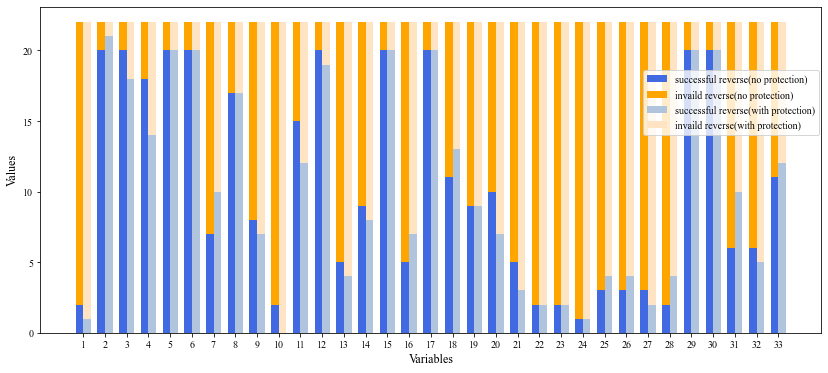

In [13]:
# mia堆叠柱状图(按特征)
df_feature_statistic = pd.DataFrame(index=range(33), columns=["perfect reverse(no protection)", "normal reverse(no protection)", 
                "successful reverse(no protection)", "invalid reverse(no protection)", "perfect reverse(with protection)", 
                "normal reverse(with protection)", "successful reverse(with protection)", "invalid reverse(with protection)"])
for i in range(33):
    _list1 = df_mia.loc[:, i].unique()
    _list2 = df_mia_pro.loc[:, i].unique()
    if 0 not in _list1:
        df_feature_statistic.loc[i, "invalid reverse(no protection)"] = 0
    else:
        df_feature_statistic.loc[i, "invalid reverse(no protection)"] = df_mia.loc[:, i].value_counts().sort_index(ascending=False)[0]

    if 0 not in _list2:
        df_feature_statistic.loc[i, "invalid reverse(with protection)"] = 0
    else:
        df_feature_statistic.loc[i, "invalid reverse(with protection)"] = df_mia_pro.loc[:, i].value_counts().sort_index(ascending=False)[0]
    
    if 1 not in _list1:
        df_feature_statistic.loc[i, "normal reverse(no protection)"] = 0
    else:
        df_feature_statistic.loc[i, "normal reverse(no protection)"] = df_mia.loc[:, i].value_counts().sort_index(ascending=False)[1]

    if 1 not in _list2:
        df_feature_statistic.loc[i, "normal reverse(with protection)"] = 0
    else:
        df_feature_statistic.loc[i, "normal reverse(with protection)"] = df_mia_pro.loc[:, i].value_counts().sort_index(ascending=False)[1]

    if 2 not in _list1:
        df_feature_statistic.loc[i, "perfect reverse(no protection)"] = 0
    else:
        df_feature_statistic.loc[i, "perfect reverse(no protection)"] = df_mia.loc[:, i].value_counts().sort_index(ascending=False)[2]

    if 2 not in _list2:
        df_feature_statistic.loc[i, "perfect reverse(with protection)"] = 0
    else:
        df_feature_statistic.loc[i, "perfect reverse(with protection)"] = df_mia_pro.loc[:, i].value_counts().sort_index(ascending=False)[2]

df_feature_statistic["successful reverse(no protection)"] = df_feature_statistic["normal reverse(no protection)"]+df_feature_statistic["perfect reverse(no protection)"]
df_feature_statistic["successful reverse(with protection)"] = df_feature_statistic["normal reverse(with protection)"]+df_feature_statistic["perfect reverse(with protection)"]

x = np.arange(33)
width = 0.35
plt.figure(figsize=(14, 6))

plt.bar(x-width/2, df_feature_statistic["successful reverse(no protection)"].values, width=0.35, label="successful reverse(no protection)", color="royalblue")
plt.bar(x-width/2, df_feature_statistic["invalid reverse(no protection)"].values, bottom=df_feature_statistic["successful reverse(no protection)"].values, width=0.35, label="invaild reverse(no protection)", color="orange")
plt.bar(x+width/2, df_feature_statistic["successful reverse(with protection)"].values, width=0.35, label="successful reverse(with protection)", color="lightsteelblue")
plt.bar(x+width/2, df_feature_statistic["invalid reverse(with protection)"].values, bottom=df_feature_statistic["successful reverse(with protection)"].values, width=0.35, label="invaild reverse(with protection)", color="bisque")
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(range(33), range(1, 34), fontsize=10)
plt.legend(bbox_to_anchor=(0.765, 0.82), fontsize=10) 
#plt.savefig("./results/mia/每个特征结果堆叠柱状图.svg", dpi=600, bbox_inches='tight')
plt.savefig("../论文图片/mia特征堆叠柱状图.pdf", dpi=600, bbox_inches='tight')

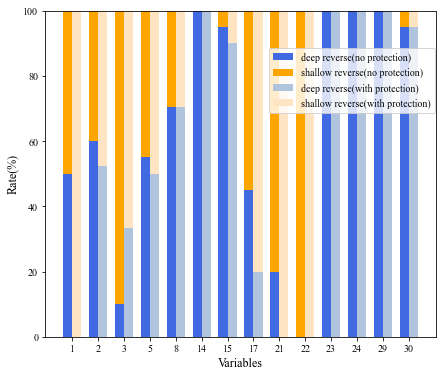

In [23]:
df_new = df_feature_statistic.loc[[0, 1, 2, 4, 7, 13, 14, 16, 20, 21, 22, 23, 28, 29], :]
x = np.arange(14)
width = 0.35
plt.figure(figsize=(7, 6))

plt.bar(x-width/2, df_new["perfect reverse(no protection)"].values/df_new["successful reverse(no protection)"].values*100, width=0.35, label="deep reverse(no protection)", color="royalblue")
plt.bar(x-width/2, df_new["normal reverse(no protection)"].values/df_new["successful reverse(no protection)"].values*100, bottom=df_new["perfect reverse(no protection)"].values/df_new["successful reverse(no protection)"].values*100, width=0.35, label="shallow reverse(no protection)", color="orange")
plt.bar(x+width/2, df_new["perfect reverse(with protection)"].values/df_new["successful reverse(with protection)"].values*100, width=0.35, label="deep reverse(with protection)", color="lightsteelblue")
plt.bar(x+width/2, df_new["normal reverse(with protection)"].values/df_new["successful reverse(with protection)"].values*100, bottom=df_new["perfect reverse(with protection)"].values/df_new["successful reverse(with protection)"].values*100, width=0.35, label="shallow reverse(with protection)", color="bisque")
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Rate(%)", fontsize=12)
plt.xticks(x, [1, 2, 3, 5, 8, 14, 15, 17, 21, 22, 23, 24, 29, 30])
plt.legend(bbox_to_anchor=(0.56, 0.9), fontsize=10)
#plt.savefig("./results/mia/每个特征结果堆叠柱状图-攻击程度百分比.svg", dpi=600, bbox_inches='tight')
plt.savefig("../论文图片/mia特征堆叠柱状图-攻击程度百分比.pdf", dpi=600, bbox_inches='tight')

In [3]:
# df_dlg and df_dlg_pro 
train_data = np.load('../data/TE/classify/train_data.npy')
df_dlg = pd.DataFrame(index=range(22), columns=range(33))
df_dlg_pro = pd.DataFrame(index=range(22), columns=range(33))
for i in range(22):
    reverse_result = np.load('./results/dlg/reverse_result/' + str(i) + '.npy')
    reverse_result_protected = np.load('./results/dlg/reverse_result_protected/' + str(i) + '.npy')
    for j in range(33):
        df = pd.DataFrame(train_data[0+i*600:600+i*600, j])
        Q1 = df.describe()[0][4]
        Q3 = df.describe()[0][6]
        IQR = Q3 - Q1
        max = Q3 + 1.5*IQR
        min = Q1 - 1.5*IQR
        median = df.describe()[0][5]

        if reverse_result[j]>Q1 and reverse_result[j]<Q3:
            df_dlg.loc[i, j] = 2
        elif (reverse_result[j]<Q1 and reverse_result[j]>min) or (reverse_result[j]<Q1 and reverse_result[j]>min):
            df_dlg.loc[i, j] = 1
        else:
            df_dlg.loc[i, j] = 0

        if reverse_result_protected[j]>Q1 and reverse_result_protected[j]<Q3:
            df_dlg_pro.loc[i, j] = 2
        elif (reverse_result_protected[j]<Q1 and reverse_result_protected[j]>min) or (reverse_result_protected[j]<Q1 and reverse_result_protected[j]>min):
            df_dlg_pro.loc[i, j] = 1
        else:
            df_dlg_pro.loc[i, j] = 0        


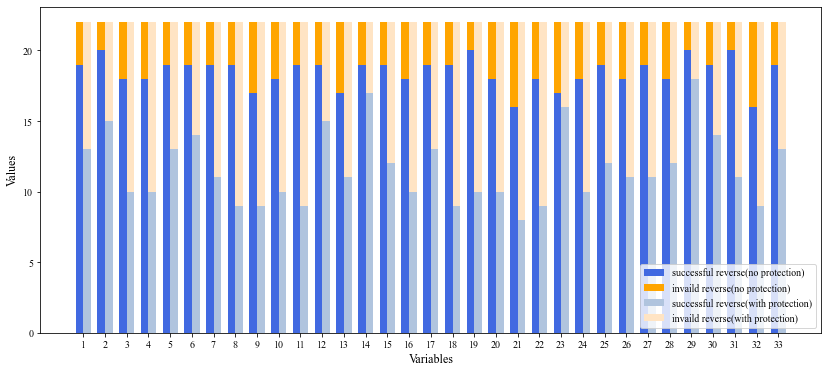

In [28]:
# dlg堆叠柱状图(按特征)
df_feature_statistic = pd.DataFrame(index=range(33), columns=["perfect reverse(no protection)", "normal reverse(no protection)", 
                "successful reverse(no protection)", "invalid reverse(no protection)", "perfect reverse(with protection)", 
                "normal reverse(with protection)", "successful reverse(with protection)", "invalid reverse(with protection)"])
for i in range(33):
    _list1 = df_dlg.loc[:, i].unique()
    _list2 = df_dlg_pro.loc[:, i].unique()
    if 0 not in _list1:
        df_feature_statistic.loc[i, "invalid reverse(no protection)"] = 0
    else:
        df_feature_statistic.loc[i, "invalid reverse(no protection)"] = df_dlg.loc[:, i].value_counts().sort_index(ascending=False)[0]

    if 0 not in _list2:
        df_feature_statistic.loc[i, "invalid reverse(with protection)"] = 0
    else:
        df_feature_statistic.loc[i, "invalid reverse(with protection)"] = df_dlg_pro.loc[:, i].value_counts().sort_index(ascending=False)[0]
    
    if 1 not in _list1:
        df_feature_statistic.loc[i, "normal reverse(no protection)"] = 0
    else:
        df_feature_statistic.loc[i, "normal reverse(no protection)"] = df_dlg.loc[:, i].value_counts().sort_index(ascending=False)[1]

    if 1 not in _list2:
        df_feature_statistic.loc[i, "normal reverse(with protection)"] = 0
    else:
        df_feature_statistic.loc[i, "normal reverse(with protection)"] = df_dlg_pro.loc[:, i].value_counts().sort_index(ascending=False)[1]

    if 2 not in _list1:
        df_feature_statistic.loc[i, "perfect reverse(no protection)"] = 0
    else:
        df_feature_statistic.loc[i, "perfect reverse(no protection)"] = df_dlg.loc[:, i].value_counts().sort_index(ascending=False)[2]

    if 2 not in _list2:
        df_feature_statistic.loc[i, "perfect reverse(with protection)"] = 0
    else:
        df_feature_statistic.loc[i, "perfect reverse(with protection)"] = df_dlg_pro.loc[:, i].value_counts().sort_index(ascending=False)[2]

df_feature_statistic["successful reverse(no protection)"] = df_feature_statistic["normal reverse(no protection)"]+df_feature_statistic["perfect reverse(no protection)"]
df_feature_statistic["successful reverse(with protection)"] = df_feature_statistic["normal reverse(with protection)"]+df_feature_statistic["perfect reverse(with protection)"]

x = np.arange(33)
width = 0.35
plt.figure(figsize=(14, 6))

plt.bar(x-width/2, df_feature_statistic["successful reverse(no protection)"].values, width=0.35, label="successful reverse(no protection)", color="royalblue")
plt.bar(x-width/2, df_feature_statistic["invalid reverse(no protection)"].values, bottom=df_feature_statistic["successful reverse(no protection)"].values, width=0.35, label="invaild reverse(no protection)", color="orange")
plt.bar(x+width/2, df_feature_statistic["successful reverse(with protection)"].values, width=0.35, label="successful reverse(with protection)", color="lightsteelblue")
plt.bar(x+width/2, df_feature_statistic["invalid reverse(with protection)"].values, bottom=df_feature_statistic["successful reverse(with protection)"].values, width=0.35, label="invaild reverse(with protection)", color="bisque")
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(range(33), range(1, 34), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="lower right", fontsize=10) 

#plt.savefig("./results/dlg/每个特征结果堆叠柱状图.svg", dpi=500, bbox_inches='tight')
plt.savefig("../论文图片/dlg特征堆叠柱状图.pdf", dpi=600, bbox_inches='tight')

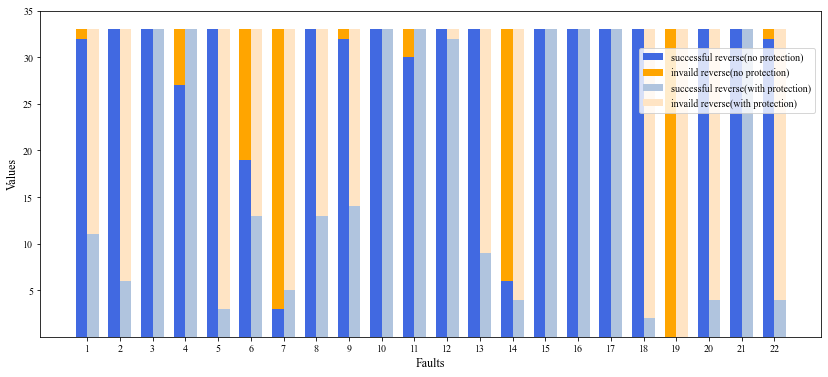

In [4]:
# dlg堆叠柱状图(按类别)
df_class_statistic = pd.DataFrame(index=range(22), columns=["perfect reverse(no protection)", "normal reverse(no protection)", 
                "successful reverse(no protection)", "invalid reverse(no protection)", "perfect reverse(with protection)", 
                "normal reverse(with protection)", "successful reverse(with protection)", "invalid reverse(with protection)"])
for i in range(22):
    _list1 = df_dlg.loc[i, :].unique()
    _list2 = df_dlg_pro.loc[i, :].unique()
    if 0 not in _list1:
        df_class_statistic.loc[i, "invalid reverse(no protection)"] = 0
    else:
        df_class_statistic.loc[i, "invalid reverse(no protection)"] = df_dlg.loc[i, :].value_counts().sort_index(ascending=False)[0]

    if 0 not in _list2:
        df_class_statistic.loc[i, "invalid reverse(with protection)"] = 0
    else:
        df_class_statistic.loc[i, "invalid reverse(with protection)"] = df_dlg_pro.loc[i, :].value_counts().sort_index(ascending=False)[0]
    
    if 1 not in _list1:
        df_class_statistic.loc[i, "normal reverse(no protection)"] = 0
    else:
        df_class_statistic.loc[i, "normal reverse(no protection)"] = df_dlg.loc[i, :].value_counts().sort_index(ascending=False)[1]

    if 1 not in _list2:
        df_class_statistic.loc[i, "normal reverse(with protection)"] = 0
    else:
        df_class_statistic.loc[i, "normal reverse(with protection)"] = df_dlg_pro.loc[i, :].value_counts().sort_index(ascending=False)[1]

    if 2 not in _list1:
        df_class_statistic.loc[i, "perfect reverse(no protection)"] = 0
    else:
        df_class_statistic.loc[i, "perfect reverse(no protection)"] = df_dlg.loc[i, :].value_counts().sort_index(ascending=False)[2]

    if 2 not in _list2:
        df_class_statistic.loc[i, "perfect reverse(with protection)"] = 0
    else:
        df_class_statistic.loc[i, "perfect reverse(with protection)"] = df_dlg_pro.loc[i, :].value_counts().sort_index(ascending=False)[2]

df_class_statistic["successful reverse(no protection)"] = df_class_statistic["normal reverse(no protection)"]+df_class_statistic["perfect reverse(no protection)"]
df_class_statistic["successful reverse(with protection)"] = df_class_statistic["normal reverse(with protection)"]+df_class_statistic["perfect reverse(with protection)"]

x = np.arange(22)
width = 0.35
plt.figure(figsize=(14, 6))

plt.bar(x-width/2, df_class_statistic["successful reverse(no protection)"].values, width=0.35, label="successful reverse(no protection)", color="royalblue")
plt.bar(x-width/2, df_class_statistic["invalid reverse(no protection)"].values, bottom=df_class_statistic["successful reverse(no protection)"].values, width=0.35, label="invaild reverse(no protection)", color="orange")
plt.bar(x+width/2, df_class_statistic["successful reverse(with protection)"].values, width=0.35, label="successful reverse(with protection)", color="lightsteelblue")
plt.bar(x+width/2, df_class_statistic["invalid reverse(with protection)"].values, bottom=df_class_statistic["successful reverse(with protection)"].values, width=0.35, label="invaild reverse(with protection)", color="bisque")
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xlabel("Faults", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(range(22), range(1, 23), fontsize=10)
plt.yticks([5, 10, 15, 20, 25, 30, 35], fontsize=10)
plt.legend(bbox_to_anchor=(0.76, 0.9), fontsize=10) 
#plt.savefig("./results/dlg/每类结果堆叠柱状图.svg", dpi=500, bbox_inches='tight')
plt.savefig("../论文图片/dlg类别堆叠柱状图.pdf", dpi=600, bbox_inches='tight')